# Project 1: Logistic Map

1. Introduce Logistic map and Lyapunov exponents

The logistic map is a simple mathematical model used to study the dynamics of population growth in ecology and the behavior of nonlinear systems in physics, engineering, and other fields. It is a one-dimensional, discrete-time dynamical system that describes the evolution of a population over time as a function of its size in the following equation:

x[n+1] = r * x[n] * (1 - x[n])

Here, x[n] represents the population size at time step n, and r is a parameter that determines the rate of population growth. The logistic map exhibits a range of complex and interesting behaviors depending on the value of r, including periodic and chaotic oscillations.

Lyapunov exponents, named after the Russian mathematician Aleksandr Lyapunov, are a measure of the rate of divergence or convergence of nearby trajectories in a dynamical system. In other words, they quantify how sensitive the system is to initial conditions. For chaotic systems like the logistic map, Lyapunov exponents can be used to determine whether a small perturbation to the initial conditions will grow exponentially over time or eventually converge to a fixed point or periodic orbit. A positive Lyapunov exponent indicates exponential growth of perturbations, while a negative exponent indicates convergence. The largest Lyapunov exponent is often used as a measure of the chaotic behavior of the system.


2. Explain the chaos by the Logistic map

The logistic map is a classic example of a nonlinear system that exhibits chaotic behavior. Chaos in the logistic map arises from the nonlinearity of the system and the sensitivity to initial conditions. When the parameter r in the logistic map is between 0 and 1, the system approaches a fixed point where the population size remains constant. When r is between 1 and approximately 3.57, the system exhibits periodic behavior, oscillating between a finite number of population sizes.
However, as r increases beyond 3.57, the system becomes chaotic. At first, the oscillations may seem random or irregular, but they are actually deterministic and repeatable. As r increases further, the system becomes more complex and unpredictable, with the population sizes appearing to jump randomly between different values.
The logistic map is particularly interesting because even small changes in the initial population size or the value of r can lead to drastically different long-term behavior of the system. This is known as the butterfly effect, where small variations in initial conditions can cause large differences in the outcome. The chaotic behavior of the logistic map has important implications for a range of fields, including physics, biology, economics, and engineering.


3. Obtain the bifurcation diagram

In [4]:
import numpy as np
import matplotlib.pyplot as plt

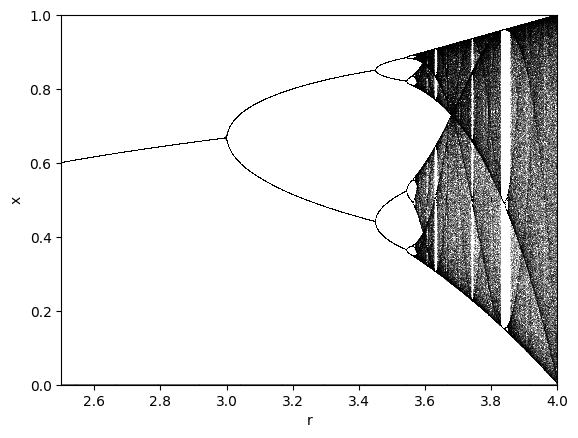

In [5]:
def logistic_map(r, x):
    return r * x * (1 - x)

# Parameters
n = 1000     # number of iterations for each value of r
r_min = 2.5  # minimum value of r
r_max = 4.0  # maximum value of r
r_step = 0.001  # step size for r

# Arrays to store data
r_values = np.arange(r_min, r_max, r_step)
x_values = np.zeros(n)

# Iterate logistic map for each value of r
for i in range(len(r_values)):
    r = r_values[i]
    x = 0.5  # initial condition
    for j in range(n):
        x = logistic_map(r, x)
        if j > n // 2:  # discard transient
            x_values[j] = x
    plt.plot([r] * (n // 2), x_values[n // 2:], ',k', alpha=.25, markersize=.1)

plt.xlabel('r')
plt.ylabel('x')
plt.xlim(r_min, r_max)
plt.ylim(0, 1)
plt.show()

4. Obtain the critical point rc

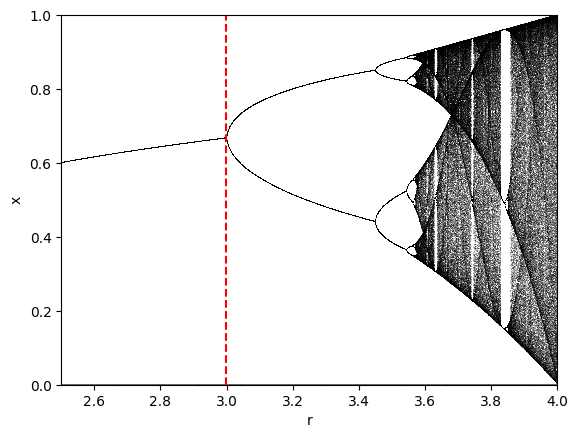

In [7]:
def logistic_map(r, x):
    return r * x * (1 - x)

# Parameters
n = 1000     # number of iterations for each value of r
r_min = 2.5  # minimum value of r
r_max = 4.0  # maximum value of r
r_step = 0.001  # step size for r

# Arrays to store data
r_values = np.arange(r_min, r_max, r_step)
x_values = np.zeros(n)

# Iterate logistic map for each value of r
for i in range(len(r_values)):
    r = r_values[i]
    x = 0.5  # initial condition
    for j in range(n):
        x = logistic_map(r, x)
        if j > n // 2:  # discard transient
            x_values[j] = x
    plt.plot([r] * (n // 2), x_values[n // 2:], ',k', alpha=.25, markersize=.1)

plt.axvline(x = 2.998, color = 'r', linestyle = '--')
plt.xlabel('r')
plt.ylabel('x')
plt.xlim(r_min, r_max)
plt.ylim(0, 1)
plt.show()

5. Plot a diagram for Lyapunov exponent

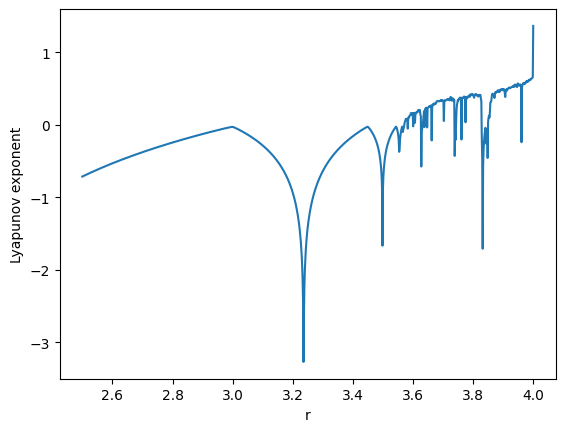

In [9]:
# Define the dynamical system as a function of x
def f(x, r):
    return r * x * (1 - x)

# Define the Lyapunov exponent function
def lyapunov_exponent(x0, r, n):
    # Initialize the sum of logarithmic derivatives
    sum = 0.0
    # Set the initial condition
    x = x0
    # Iterate the system and compute the sum
    for i in range(n):
        # Compute the derivative of f with respect to x
        dfdx = r - 2 * r * x
        # Add a small offset to avoid divide-by-zero errors
        eps = 1e-10
        dfdx = np.maximum(eps, np.abs(dfdx))
        # Update the sum of logarithmic derivatives
        sum += np.log(dfdx)
        # Update the value of x
        x = f(x, r)
    # Compute the average Lyapunov exponent
    return sum / n


# Define the range of parameter values to test
r_values = np.linspace(2.5, 4.0, 1000)

# Set the initial condition and number of iterations
x0 = 0.5
n = 1000

# Compute the Lyapunov exponent for each value of r
lyapunov = [lyapunov_exponent(x0, r, n) for r in r_values]

# Plot the Lyapunov exponent as a function of r
plt.plot(r_values, lyapunov)
plt.xlabel('r')
plt.ylabel('Lyapunov exponent')
plt.show()


6. Suggest other one-dimensional map showing chaos and report bifurcation diagram and Lyapunov exponent

One other one-dimensional map that exhibits chaos is the Hénon map. The Hénon map is defined as follows:
x_n+1 = 1 - a * x_n^2 + y_n
y_n+1 = b * x_n
where a and b are control parameters, and x_n and y_n are the state variables at time n.